## Problem statement :
    Predict the incoming schema whether it belong to existing schema or not using classification model

### Load Dependencies

In [4]:
%pip install nltk


  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Chirag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# load packages
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
# Step 1: Read the CSV file into a pandas DataFrame
csv_file_path = r"/content/test.csv"  # Replace with the path to your CSV file
original_data = pd.read_csv(csv_file_path,encoding='utf-8',encoding_errors='ignore')

original_data = original_data.dropna(axis=1, how='all')

original_data.info()


FileNotFoundError: [Errno 2] No such file or directory: '/content/test.csv'

In [3]:
original_data.describe()

,Policy Occurrence Limit,Model Year
count,11000.000000,10944.000000
mean,982727.272727,2016.571637
std,63405.048565,5.050633
min,750000.000000,2000.000000
25%,1000000.000000,2014.000000
50%,1000000.000000,2017.000000
75%,1000000.000000,2020.000000
max,1000000.000000,2024.000000


In [4]:
original_data.columns

Index(['MGA', 'Full policy number', 'Policy Effective Date',
       'Policy Expiration Date', 'Insured Name', 'Insured Address',
       'Insured City', 'Insured State', 'Insured Zip',
       'Transaction Effective Date', 'Transaction Expiration Date',
       'Commission amount', 'Book or Process Date', 'Policy Type',
       'Transaction Type', 'Primary/Excess Indicator', 'Attachment Point',
       'CM/Occ Indicator', 'Risk/Location Address', 'Risk/Location State',
       'Risk/Location Zip', 'Exposure Type', 'Policy Occurrence Limit',
       'Policy Aggregate Limit', 'Policy Event Number', 'Carrier %',
       'Broker/Agent', 'Broker/Agent Address', 'Broker/Agent City',
       'Broker/Agent State', 'Broker/Agent Zip', 'Vehicle Number',
       'Vehicle Type', 'Radius Of Use', 'Gross Vehicle Weight', 'Vehicle Make',
       'Vehicle Model', 'Model Year', 'Vehicle Identification Number',
       'Specialized Vehicle Type',
       'Vehicle Number of Seats, Seating Capacity'],
      dtype='obj

In [5]:
# Drop data having dates
original_data.drop(['Policy Effective Date','Policy Expiration Date','Transaction Effective Date','Transaction Expiration Date','Book or Process Date'],axis=1,inplace=True)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MGA                                        11007 non-null  object 
 1   Full policy number                         11015 non-null  object 
 2   Insured Name                               11015 non-null  object 
 3   Insured Address                            11015 non-null  object 
 4   Insured City                               11015 non-null  object 
 5   Insured State                              11015 non-null  object 
 6   Insured Zip                                11015 non-null  object 
 7   Commission amount                          11021 non-null  object 
 8   Policy Type                                11000 non-null  object 
 9   Transaction Type                           11015 non-null  object 
 10  Primary/Excess Indicat

In [6]:
# policy event number and full policy number is same (both has same data)

original_data.drop('Policy Event Number',axis=1,inplace=True)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MGA                                        11007 non-null  object 
 1   Full policy number                         11015 non-null  object 
 2   Insured Name                               11015 non-null  object 
 3   Insured Address                            11015 non-null  object 
 4   Insured City                               11015 non-null  object 
 5   Insured State                              11015 non-null  object 
 6   Insured Zip                                11015 non-null  object 
 7   Commission amount                          11021 non-null  object 
 8   Policy Type                                11000 non-null  object 
 9   Transaction Type                           11015 non-null  object 
 10  Primary/Excess Indicat

In [7]:
# Vehicle Type and Specialized Vehicle Type is same (both has same data)

original_data.drop('Specialized Vehicle Type',axis=1,inplace=True)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MGA                                        11007 non-null  object 
 1   Full policy number                         11015 non-null  object 
 2   Insured Name                               11015 non-null  object 
 3   Insured Address                            11015 non-null  object 
 4   Insured City                               11015 non-null  object 
 5   Insured State                              11015 non-null  object 
 6   Insured Zip                                11015 non-null  object 
 7   Commission amount                          11021 non-null  object 
 8   Policy Type                                11000 non-null  object 
 9   Transaction Type                           11015 non-null  object 
 10  Primary/Excess Indicat

In [8]:
# Vehicle Number of Seats, Seating Capacity represents dates
original_data.drop('Vehicle Number of Seats, Seating Capacity',axis=1,inplace=True)

In [9]:
# Insured State and Risk/Location State is same (both has same data)

original_data.drop('Risk/Location State',axis=1,inplace=True)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MGA                            11007 non-null  object 
 1   Full policy number             11015 non-null  object 
 2   Insured Name                   11015 non-null  object 
 3   Insured Address                11015 non-null  object 
 4   Insured City                   11015 non-null  object 
 5   Insured State                  11015 non-null  object 
 6   Insured Zip                    11015 non-null  object 
 7   Commission amount              11021 non-null  object 
 8   Policy Type                    11000 non-null  object 
 9   Transaction Type               11015 non-null  object 
 10  Primary/Excess Indicator       11000 non-null  object 
 11  Attachment Point               10967 non-null  object 
 12  CM/Occ Indicator               11000 non-null 

In [10]:
# remove data with numbers and mix datatype
original_data.drop(['Insured Zip','Commission amount','Policy Aggregate Limit','Policy Occurrence Limit','Carrier %','Radius Of Use','Model Year','Broker/Agent Zip','Risk/Location Zip','Broker/Agent Zip','Vehicle Identification Number'],axis=1,inplace=True)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MGA                       11007 non-null  object
 1   Full policy number        11015 non-null  object
 2   Insured Name              11015 non-null  object
 3   Insured Address           11015 non-null  object
 4   Insured City              11015 non-null  object
 5   Insured State             11015 non-null  object
 6   Policy Type               11000 non-null  object
 7   Transaction Type          11015 non-null  object
 8   Primary/Excess Indicator  11000 non-null  object
 9   Attachment Point          10967 non-null  object
 10  CM/Occ Indicator          11000 non-null  object
 11  Risk/Location Address     11000 non-null  object
 12  Exposure Type             10607 non-null  object
 13  Broker/Agent              11000 non-null  object
 14  Broker/Agent Address  

In [11]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MGA                       11007 non-null  object
 1   Full policy number        11015 non-null  object
 2   Insured Name              11015 non-null  object
 3   Insured Address           11015 non-null  object
 4   Insured City              11015 non-null  object
 5   Insured State             11015 non-null  object
 6   Policy Type               11000 non-null  object
 7   Transaction Type          11015 non-null  object
 8   Primary/Excess Indicator  11000 non-null  object
 9   Attachment Point          10967 non-null  object
 10  CM/Occ Indicator          11000 non-null  object
 11  Risk/Location Address     11000 non-null  object
 12  Exposure Type             10607 non-null  object
 13  Broker/Agent              11000 non-null  object
 14  Broker/Agent Address  

### EDA

In [12]:
# fill missing data using mode *****

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

array = imputer.fit_transform(original_data)

df = pd.DataFrame(array,columns=original_data.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11077 entries, 0 to 11076
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MGA                       11077 non-null  object
 1   Full policy number        11077 non-null  object
 2   Insured Name              11077 non-null  object
 3   Insured Address           11077 non-null  object
 4   Insured City              11077 non-null  object
 5   Insured State             11077 non-null  object
 6   Policy Type               11077 non-null  object
 7   Transaction Type          11077 non-null  object
 8   Primary/Excess Indicator  11077 non-null  object
 9   Attachment Point          11077 non-null  object
 10  CM/Occ Indicator          11077 non-null  object
 11  Risk/Location Address     11077 non-null  object
 12  Exposure Type             11077 non-null  object
 13  Broker/Agent              11077 non-null  object
 14  Broker/Agent Address  

In [13]:
# Step 2: Create a new DataFrame for the labeled data
labeled_data = pd.DataFrame(columns=["Content", "Column_Name"])

In [14]:
# Step 3: Iterate through the original DataFrame to extract content and column name
for column in df.columns:
    content = df[column].astype(str)
    labeled_data = pd.concat([labeled_data, pd.DataFrame({"Content": list(content), "Column_Name": column})], ignore_index=True)

In [15]:
# Step 4: The 'labeled_data' DataFrame now contains content and column name
print(labeled_data)

                                       Content    Column_Name
0       Arrowhead General Insurance Agency Inc            MGA
1       Arrowhead General Insurance Agency Inc            MGA
2       Arrowhead General Insurance Agency Inc            MGA
3       Arrowhead General Insurance Agency Inc            MGA
4       Arrowhead General Insurance Agency Inc            MGA
...                                        ...            ...
243689                                CASCADIA  Vehicle Model
243690                                CASCADIA  Vehicle Model
243691                                CASCADIA  Vehicle Model
243692                                CASCADIA  Vehicle Model
243693                                CASCADIA  Vehicle Model

[243694 rows x 2 columns]


## Randomize the data

In [16]:
labeled_data = labeled_data.sample(frac=1,random_state=18)

In [17]:
labeled_data

,Content,Column_Name
79912,EN,Transaction Type
114802,Occurrence,CM/Occ Indicator
242753,CASCADIA,Vehicle Model
223,Daniel Abrahamsen,MGA
213442,"Extra Heavy Trucks (45,001+)",Gross Vehicle Weight
...,...,...
1726,Daniel Abrahamsen,MGA
35653,906 W STERRETT ST,Insured Address
91256,Primary,Primary/Excess Indicator
94483,Primary,Primary/Excess Indicator


In [18]:
labeled_data['Content'][0:5]

79912                               EN
114802                      Occurrence
242753                        CASCADIA
223                  Daniel Abrahamsen
213442    Extra Heavy Trucks (45,001+)
Name: Content, dtype: object

## Data Splitting

In [19]:

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

In [20]:
test_data.shape

(48739, 2)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194955 entries, 150641 to 79978
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Content      194955 non-null  object
 1   Column_Name  194955 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [22]:
train_data['Content'][0]

'Arrowhead General Insurance Agency Inc'

## Tokenization

In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [24]:
def tokenization(data):
  token = word_tokenize(data)

  text = [word.lower() for word in token]

  return " ".join(text)

tokenization(train_data['Content'][0])

'arrowhead general insurance agency inc'

In [25]:
train_data['Content'] = train_data['Content'].apply(tokenization)
test_data['Content'] = test_data['Content'].apply(tokenization)

In [26]:
train_data['Content'].head()

150641    cover whale insurance solutions inc .
136768                                      2.0
170687                                las vegas
211133        medium trucks ( 10,000 - 20,000 )
130690                2420 west glenrosa avenue
Name: Content, dtype: object

In [27]:
train_data['Column_Name'].head()

150641             Broker/Agent
136768            Exposure Type
170687        Broker/Agent City
211133     Gross Vehicle Weight
130690    Risk/Location Address
Name: Column_Name, dtype: object

### Text to Vector

In [28]:
count = CountVectorizer()

train_array = count.fit_transform(train_data['Content']).A
train_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
test_array = count.transform(test_data['Content']).A
test_array

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Train model

In [30]:
model = MultinomialNB()
model.fit(train_array,train_data['Column_Name'])

MultinomialNB()

In [31]:
model.n_features_in_

4368

In [32]:
# Make predictions on the testing data
predictions = model.predict(test_array)

# Calculate accuracy
accuracy = accuracy_score(test_data['Column_Name'], predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [33]:
labeled_data['Column_Name'].value_counts()

Transaction Type            11077
CM/Occ Indicator            11077
Risk/Location Address       11077
Broker/Agent Address        11077
Attachment Point            11077
Primary/Excess Indicator    11077
Exposure Type               11077
Vehicle Make                11077
Broker/Agent City           11077
Broker/Agent State          11077
Vehicle Type                11077
Vehicle Number              11077
Full policy number          11077
Insured City                11077
Policy Type                 11077
Insured Address             11077
Insured State               11077
Broker/Agent                11077
Gross Vehicle Weight        11077
MGA                         11077
Vehicle Model               11077
Insured Name                11077
Name: Column_Name, dtype: int64

In [34]:
clf_report = classification_report(test_data['Column_Name'],predictions)
print("Classification report:\n",clf_report)

Classification report:
                           precision    recall  f1-score   support

        Attachment Point       0.00      0.00      0.00      2251
            Broker/Agent       1.00      1.00      1.00      2299
    Broker/Agent Address       1.00      0.99      1.00      2184
       Broker/Agent City       1.00      1.00      1.00      2190
      Broker/Agent State       1.00      1.00      1.00      2240
        CM/Occ Indicator       1.00      1.00      1.00      2138
           Exposure Type       0.93      0.03      0.05      2249
      Full policy number       1.00      1.00      1.00      2219
    Gross Vehicle Weight       0.98      1.00      0.99      2204
         Insured Address       0.55      0.49      0.52      2278
            Insured City       0.99      0.98      0.99      2192
            Insured Name       1.00      0.99      0.99      2203
           Insured State       0.99      1.00      0.99      2224
                     MGA       1.00      1.00      

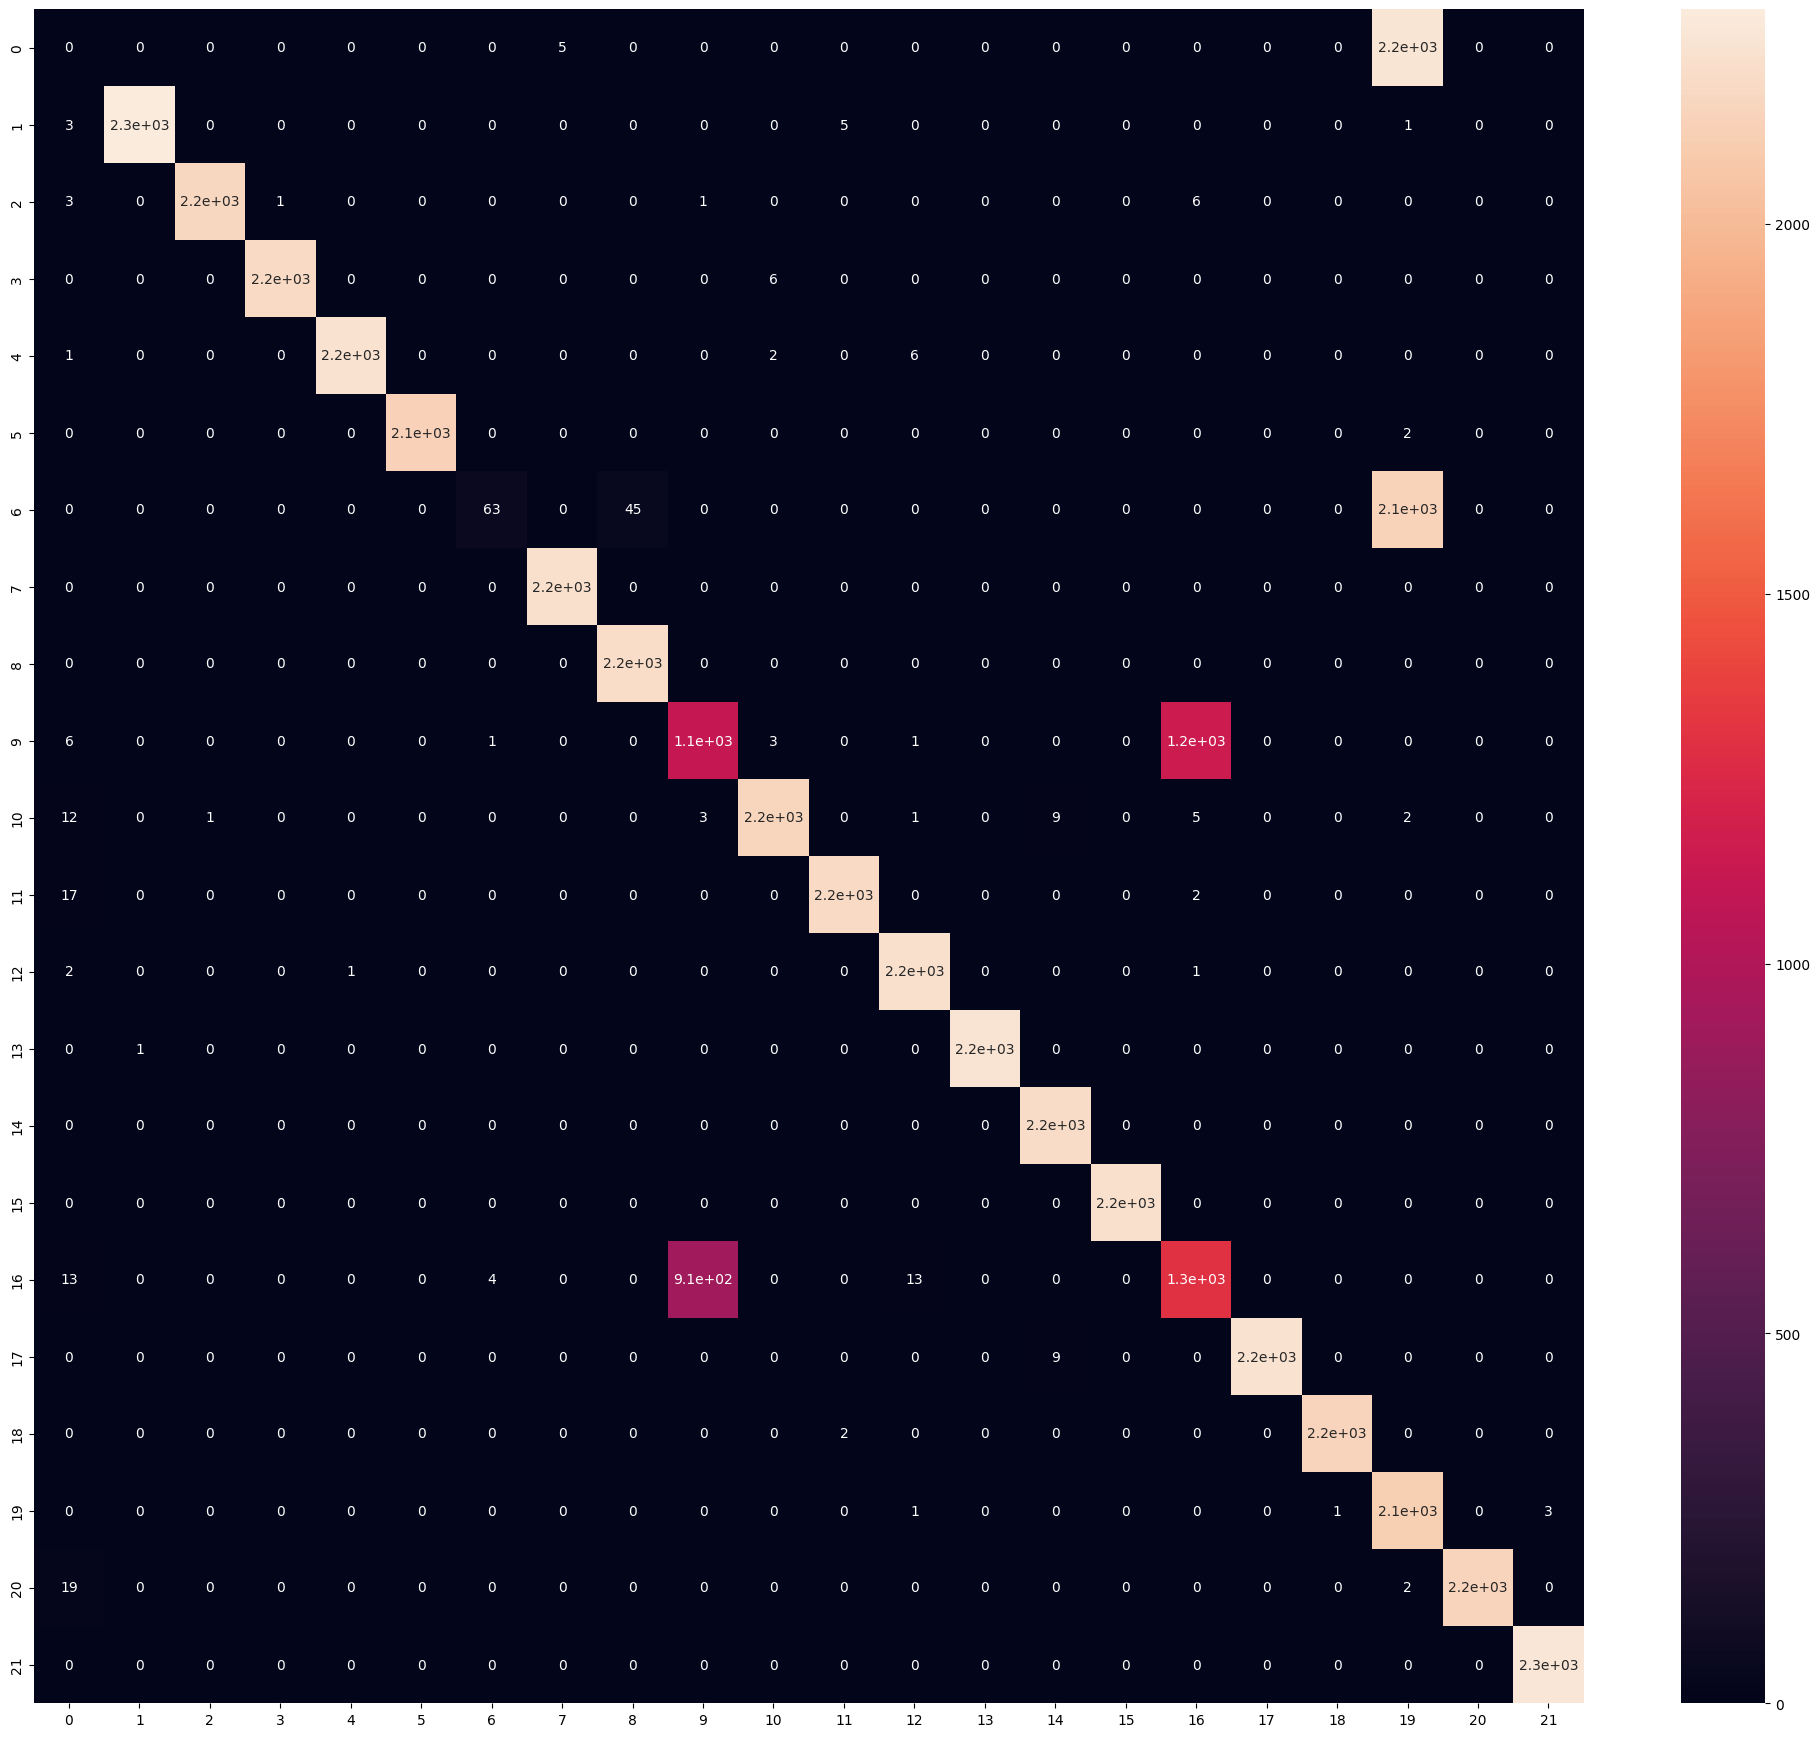

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,22))
conf_matrix = confusion_matrix(test_data['Column_Name'],predictions)
plt.show(sns.heatmap(conf_matrix,fmt='.2g',annot=True))
# plt.ylabel(test_data['Column_Name'])
# plt.xlabel(test_data['Column_Name'])

In [ ]:
# Test data evaluation

from sklearn.metrics import accuracy_score
test_pred = model.predict(test_data['Content'])

print("Accuracy on testing data: ",accuracy_score(test_data['Column_Name'],test_pred))

clf_report = classification_report(test_data['Column_Name'],test_pred)
print("Classification report:\n",clf_report)

cnf_matrix = confusion_matrix(test_data['Column_Name'],test_pred)
ConfusionMatrixDisplay(cnf_matrix).plot()

In [36]:
input_data = """
FCD1000016-00
One Year
new
AL
Cleburne County Chamber of Commerce
PO BOX 413
Heflin
Cleburne
AL
PO BOX 413
Heflin
Cleburne
TERROR
Convelo-D&O-Terror
"""

In [37]:
new_content = [data for data in input_data.split('\n') if data]
new_content

['FCD1000016-00',
 'One Year',
 'new',
 'AL',
 'Cleburne County Chamber of Commerce',
 'PO BOX 413',
 'Heflin',
 'Cleburne',
 'AL',
 'PO BOX 413',
 'Heflin',
 'Cleburne',
 'TERROR',
 'Convelo-D&O-Terror']

In [38]:
# New content to predict column names
test = count.transform(new_content)

In [39]:
# Predict column names for new content
predicted_column_names = model.predict(test)
print("Predicted Column Names:", predicted_column_names)

Predicted Column Names: ['Full policy number' 'Insured Name' 'Policy Type' 'Insured State'
 'Risk/Location Address' 'Insured Address' 'Vehicle Model' 'Vehicle Model'
 'Insured State' 'Insured Address' 'Vehicle Model' 'Vehicle Model'
 'Vehicle Model' 'Vehicle Model']


In [40]:
pd.DataFrame(new_content)

,0
0,FCD1000016-00
1,One Year
2,new
3,AL
4,Cleburne County Chamber of Commerce
5,PO BOX 413
6,Heflin
7,Cleburne
8,AL
9,PO BOX 413


In [41]:
pd.DataFrame(predicted_column_names)

,0
0,Full policy number
1,Insured Name
2,Policy Type
3,Insured State
4,Risk/Location Address
5,Insured Address
6,Vehicle Model
7,Vehicle Model
8,Insured State
9,Insured Address


In [42]:
df_12_07 = pd.concat([pd.DataFrame(new_content),pd.DataFrame(predicted_column_names)],axis=1)
df_12_07

,0,0
0,FCD1000016-00,Full policy number
1,One Year,Insured Name
2,new,Policy Type
3,AL,Insured State
4,Cleburne County Chamber of Commerce,Risk/Location Address
5,PO BOX 413,Insured Address
6,Heflin,Vehicle Model
7,Cleburne,Vehicle Model
8,AL,Insured State
9,PO BOX 413,Insured Address


### Random Forest Model

In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_array,train_data['Column_Name'])
rf_model

RandomForestClassifier(random_state=42)

In [46]:
# Make predictions on the testing data
predictions = rf_model.predict(test_array)

# Calculate accuracy
accuracy = accuracy_score(test_data['Column_Name'], predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


In [47]:
# Random forest classification report
clf_report = classification_report(test_data['Column_Name'],predictions)
print("Classification report:\n",clf_report)

Classification report:
                           precision    recall  f1-score   support

        Attachment Point       0.51      1.00      0.68      2251
            Broker/Agent       1.00      1.00      1.00      2299
    Broker/Agent Address       1.00      1.00      1.00      2184
       Broker/Agent City       1.00      1.00      1.00      2190
      Broker/Agent State       1.00      1.00      1.00      2240
        CM/Occ Indicator       1.00      1.00      1.00      2138
           Exposure Type       1.00      0.05      0.09      2249
      Full policy number       1.00      1.00      1.00      2219
    Gross Vehicle Weight       1.00      1.00      1.00      2204
         Insured Address       0.52      0.54      0.53      2278
            Insured City       1.00      1.00      1.00      2192
            Insured Name       1.00      1.00      1.00      2203
           Insured State       1.00      1.00      1.00      2224
                     MGA       1.00      1.00      

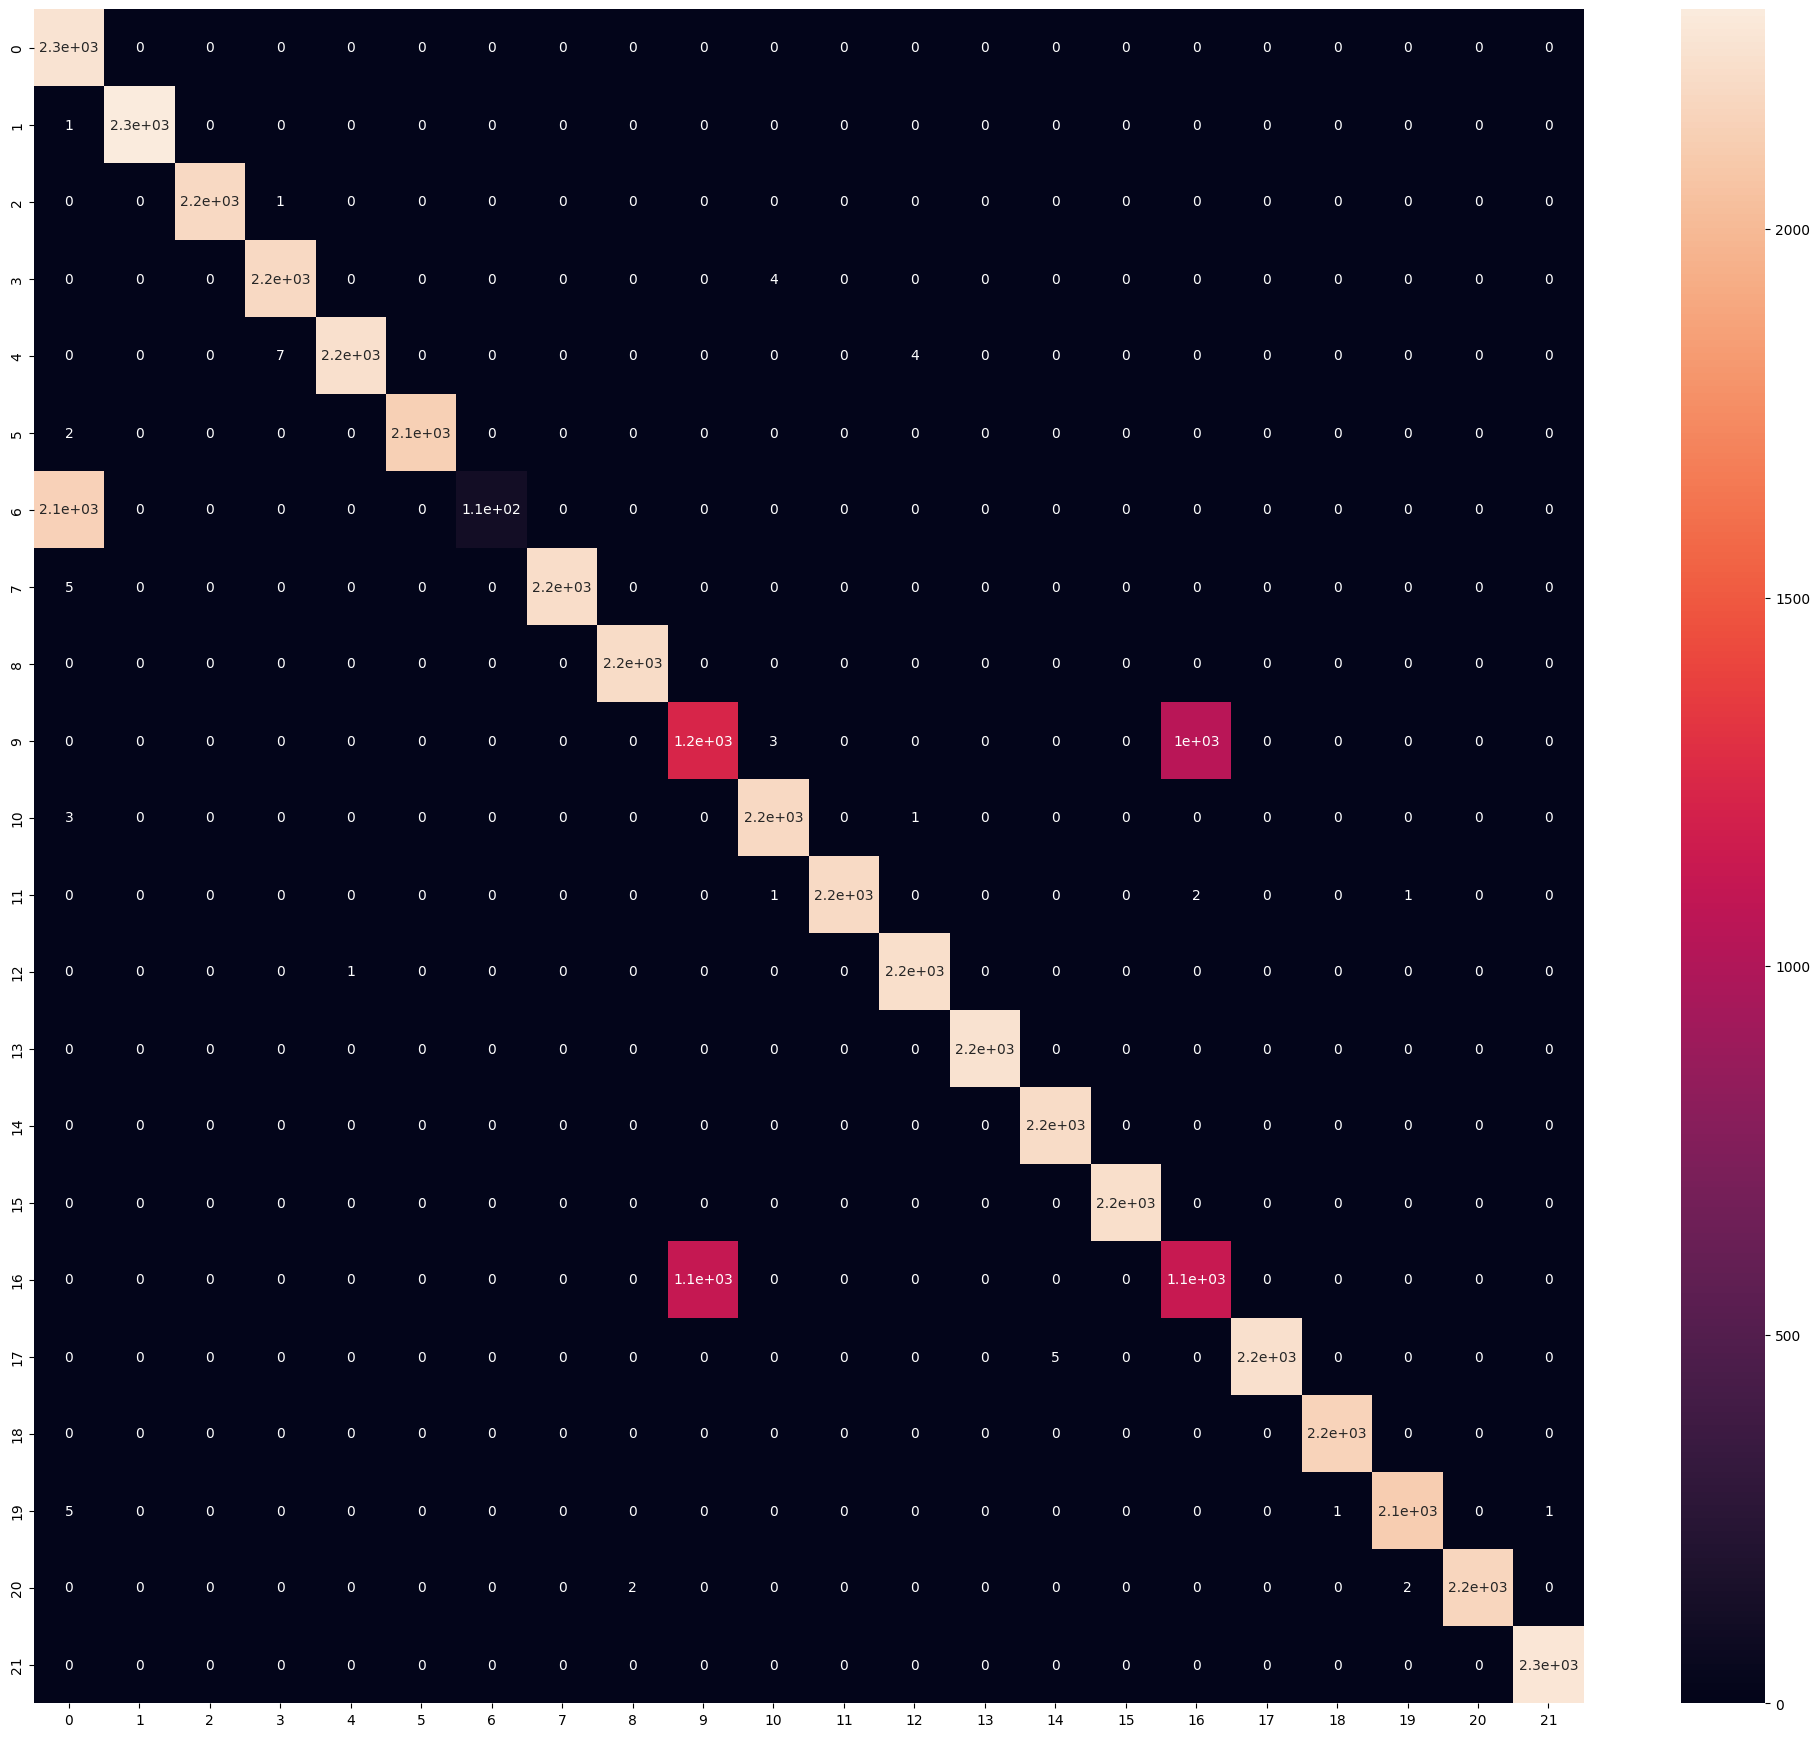

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,22))
conf_matrix = confusion_matrix(test_data['Column_Name'],predictions)
plt.show(sns.heatmap(conf_matrix,fmt='.2g',annot=True))
# plt.ylabel(test_data['Column_Name'])
# plt.xlabel(test_data['Column_Name'])

Accuracy on testing data:  0.9106875397525596
Classification report:
                           precision    recall  f1-score   support

        Attachment Point       0.51      1.00      0.68      2251
            Broker/Agent       1.00      1.00      1.00      2299
    Broker/Agent Address       1.00      1.00      1.00      2184
       Broker/Agent City       1.00      1.00      1.00      2190
      Broker/Agent State       1.00      1.00      1.00      2240
        CM/Occ Indicator       1.00      1.00      1.00      2138
           Exposure Type       1.00      0.05      0.09      2249
      Full policy number       1.00      1.00      1.00      2219
    Gross Vehicle Weight       1.00      1.00      1.00      2204
         Insured Address       0.52      0.54      0.53      2278
            Insured City       1.00      1.00      1.00      2192
            Insured Name       1.00      1.00      1.00      2203
           Insured State       1.00      1.00      1.00      2224
     

<Axes: >

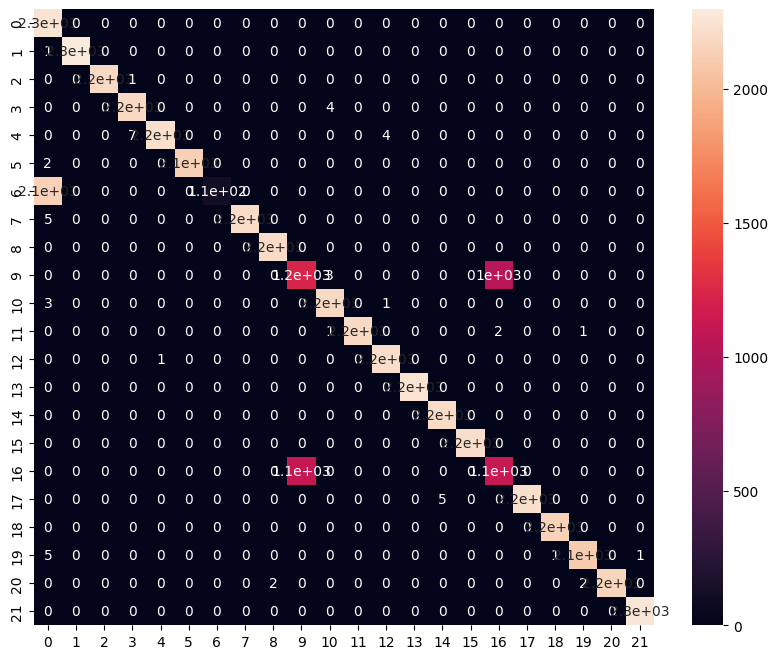

In [54]:
# Test data evaluation

from sklearn.metrics import accuracy_score
test_pred = rf_model.predict(test_array)

print("Accuracy on testing data: ",accuracy_score(test_data['Column_Name'],test_pred))

clf_report = classification_report(test_data['Column_Name'],test_pred)
print("Classification report:\n",clf_report)

cnf_matrix = confusion_matrix(test_data['Column_Name'],test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cnf_matrix,annot=True)
# plt.xlabel(train_data['Column_Name'])

In [55]:
input_data = """
FCD1000016-00
One Year
new
AL
Cleburne County Chamber of Commerce
PO BOX 413
Heflin
Cleburne
AL
PO BOX 413
Heflin
Cleburne
AL
TERROR
Convelo-D&O-Terror
"""

In [56]:
new_content = [data for data in input_data.split('\n') if data]
new_content

['FCD1000016-00',
 'One Year',
 'new',
 'AL',
 'Cleburne County Chamber of Commerce',
 'PO BOX 413',
 'Heflin',
 'Cleburne',
 'AL',
 'PO BOX 413',
 'Heflin',
 'Cleburne',
 'AL',
 'TERROR',
 'Convelo-D&O-Terror']

In [57]:
# New content to predict column names
# new_content = ["08-07-2023", "08-07-2023","All Other Liability Occurrence",'Primary','154 WESTLAND ST','$2,000,000']
test = count.transform(new_content)
# Predict column names for new content
predicted_column_names = rf_model.predict(test)

print("Predicted Column Names:", predicted_column_names)


Predicted Column Names: ['Attachment Point' 'Attachment Point' 'Transaction Type' 'Insured State'
 'Attachment Point' 'Insured Address' 'Attachment Point'
 'Attachment Point' 'Insured State' 'Insured Address' 'Attachment Point'
 'Attachment Point' 'Insured State' 'Attachment Point' 'Attachment Point']


In [58]:
pd.DataFrame(new_content)

,0
0,FCD1000016-00
1,One Year
2,new
3,AL
4,Cleburne County Chamber of Commerce
5,PO BOX 413
6,Heflin
7,Cleburne
8,AL
9,PO BOX 413


In [59]:
pd.DataFrame(predicted_column_names)

,0
0,Attachment Point
1,Attachment Point
2,Transaction Type
3,Insured State
4,Attachment Point
5,Insured Address
6,Attachment Point
7,Attachment Point
8,Insured State
9,Insured Address


In [60]:
df_12_07 = pd.concat([pd.DataFrame(new_content),pd.DataFrame(predicted_column_names)],axis=1)
df_12_07

,0,0
0,FCD1000016-00,Attachment Point
1,One Year,Attachment Point
2,new,Transaction Type
3,AL,Insured State
4,Cleburne County Chamber of Commerce,Attachment Point
5,PO BOX 413,Insured Address
6,Heflin,Attachment Point
7,Cleburne,Attachment Point
8,AL,Insured State
9,PO BOX 413,Insured Address


In [ ]:
import pandas as pd

def inference_new_data(csv_file_path):
    # Read the new CSV data into a pandas DataFrame
    new_data = pd.read_csv(csv_file_path)

    # Create an empty DataFrame to store the unique results
    unique_results = pd.DataFrame(columns=["Content", "Predicted_Column_Name"])

    # Create a set to keep track of unique column names
    unique_columns = set()

    # Iterate through the columns in the new data
    for column in new_data.columns:
        content = new_data[column].astype(str)

        # Predict the column name for each content
        predicted_column_name = model.predict(content)

        # Ensure the lengths of content and predicted_column_name match
        min_length = min(len(content), len(predicted_column_name))
        content = content[:min_length]
        predicted_column_name = predicted_column_name[:min_length]

        pred_column = predicted_column_name[0]

        # Check if the column name is already in the set
        if column not in unique_columns:
            # Add the unique column name and its corresponding predicted column name to the DataFrame
            unique_results = pd.concat([unique_results, pd.DataFrame({"Content": [column], "Predicted_Column_Name": [pred_column]})], ignore_index=True)

            # Add the column name to the set to mark it as unique
            unique_columns.add(column)

    return unique_results


In [ ]:
# Load your trained model (replace with the path to your trained model)
# trained_model = model.predict(new_content)

# Perform inference on the new CSV data
new_data_path = r"D:\Workspace\Data_Collection\06_12\Model_Ipynb\ProdFortegraConveloMain.csv"  # Replace with the path to your new CSV file
inference_results = inference_new_data(new_data_path)
print(inference_results)
# Save the inference results to a new CSV file
inference_results.to_csv("D:\Workspace\Data_Collection\06_12\Model_Ipynb\inference_result.csv", index=False)

                  Content        Predicted_Column_Name
0         Accounting_Date        Policy Effective Date
1            Company_Code                Exposure Type
2           Policy_Number          Policy Event Number
3            Pol_Eff_Date        Policy Effective Date
4            Pol_Exp_Date  Transaction Expiration Date
5             Policy_Term                 Insured Name
6          Trans_Eff_Date        Policy Effective Date
7          Trans_Exp_Date  Transaction Expiration Date
8            Process_Date   Transaction Effective Date
9              Trans_Type                  Policy Type
10        Trans_Reason_Cd                Exposure Type
11                    ASL            Commission amount
12         State_Domicile          Risk/Location State
13           Insured_name        Risk/Location Address
14        Business_Street              Insured Address
15          Business_City                    Carrier %
16        Business_County                    Carrier %
17        

OSError: Cannot save file into a non-existent directory: 'D:\Workspace\Data_Collection_12\Model_Ipynb'

In [ ]:
import pandas as pd

# Load your unique results mapping (from inference results)
unique_results = pd.read_csv("D:/snowpark/tesed csv/New folder/Word2Vac/inference_results.csv")

# Load your new data CSV
new_data_path = "D:/snowpark/tesed csv/New folder/Word2Vac/data_3__input.csv"
new_data = pd.read_csv(new_data_path)

# Create a dictionary to map original column names to predicted column names
column_mapping = dict(zip(unique_results["Content"], unique_results["Predicted_Column_Name"]))

# Rename columns in the new data based on the mapping
new_data.rename(columns=column_mapping, inplace=True)

# Save the modified new data as 'output.csv'
output_csv_path = "D:/snowpark/tesed csv/New folder/Word2Vac/output.csv"
new_data.to_csv(output_csv_path, index=False)


In [ ]:
import pandas as pd

def create_mapped_csv(csv_file_path, output_csv_path):
    # Read the new CSV data into a pandas DataFrame
    new_data = pd.read_csv(csv_file_path)

    # Create an empty DataFrame to store the mapped results
    mapped_data = pd.DataFrame(columns=["Original_Column_Name", "Predicted_Column_Name"])

    # Iterate through the columns in the new data
    for column in new_data.columns:
        content = new_data[column].astype(str)

        # Predict the column name for each content
        predicted_column_name = model.predict(content)

        # Ensure the lengths of content and predicted_column_name match
        min_length = min(len(content), len(predicted_column_name))
        content = content[:min_length]
        predicted_column_name = predicted_column_name[:min_length]

        # Create a DataFrame with the mapped results
        result_df = pd.DataFrame({
            "Original_Column_Name": [column] * min_length,
            "Predicted_Column_Name": predicted_column_name
        })

        # Append the result to the mapped_data DataFrame
        mapped_data = pd.concat([mapped_data, result_df], ignore_index=True)

    # Save the mapped results to a CSV file
    mapped_data.to_csv(output_csv_path, index=False)

# Usage
# trained_model = YourTrainedModel.load("trained_model_path")
new_data_path = "D:/snowpark/tesed csv/New folder/Word2Vac/data_3__input.csv"
output_csv_path = "D:/snowpark/tesed csv/New folder/Word2Vac/mapped_results.csv"
create_mapped_csv(new_data_path, output_csv_path)


In [ ]:
import pandas as pd
from collections import Counter

def create_mapped_csv(csv_file_path, output_csv_path):
    # Read the new CSV data into a pandas DataFrame
    new_data = pd.read_csv(csv_file_path)

    # Create an empty DataFrame to store the mapped results
    mapped_data = pd.DataFrame(columns=["Original_Column_Name", "Predicted_Column_Name"])

    # Iterate through the columns in the new data
    for column in new_data.columns:
        content = new_data[column].astype(str)

        # Initialize a list to store predicted column names for each value in the column
        predicted_column_names = []

        # Predict the column name for each content in the column
        for value in content:
            predicted_column_name = model.predict([value])[0]
            predicted_column_names.append(predicted_column_name)

        # Count the most frequent predicted column name for this column
        most_common_name = Counter(predicted_column_names).most_common(1)[0][0]

        # Create a DataFrame with the mapped result for this column
        result_df = pd.DataFrame({
            "Original_Column_Name": [column],
            "Predicted_Column_Name": [most_common_name]
        })

        # Append the result to the mapped_data DataFrame
        mapped_data = pd.concat([mapped_data, result_df], ignore_index=True)

    # Save the mapped results to a CSV file
    mapped_data.to_csv(output_csv_path, index=False)

# Usage
# trained_model = YourTrainedModel.load("trained_model_path")
new_data_path = "D:/snowpark/tesed csv/New folder/Word2Vac/data_3__input.csv"
output_csv_path = "D:/snowpark/tesed csv/New folder/Word2Vac/mapped_results.csv"
create_mapped_csv(new_data_path, output_csv_path)


## Using Word Embedding and LSTM

In [ ]:
# Assuming 'texts' is a list of your text data and 'labels' is a list of corresponding labels
texts = train_data['Content']

In [ ]:
labels = train_data['Column_Name']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Tokenize and pad sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# print("Sequence: ",sequences)

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)
# print("Padded sequence: ",sequences)
# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=padded_sequences.shape[1]),
    LSTM(100),
    Dense(170, activation='softmax')  # Assuming 170 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(padded_sequences, tf.keras.utils.to_categorical(labels), epochs=10, validation_split=0.2)


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 9, 50)             188400    
                                                                 
 lstm_4 (LSTM)               (None, 100)               60400     
                                                                 
 dense_4 (Dense)             (None, 170)               17170     
                                                                 
Total params: 265970 (1.01 MB)
Trainable params: 265970 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model)

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
import sweetviz as sw
report = sw.analyze(original_data)
report.show_html('report.html')

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
model.weights[0]

<tf.Variable 'embedding_3/embeddings:0' shape=(3768, 50) dtype=float32, numpy=
array([[ 0.01227578, -0.02150908, -0.03908286, ..., -0.02466954,
        -0.00033079,  0.02953323],
       [ 0.02778159, -0.00910582,  0.02718729, ..., -0.03726996,
         0.02204807,  0.01576289],
       [-0.0087285 , -0.04148183, -0.0262681 , ...,  0.03910509,
         0.04371804,  0.01920805],
       ...,
       [-0.03051256,  0.0408977 , -0.04311079, ..., -0.02475926,
         0.00243813, -0.01206296],
       [ 0.04667204, -0.04040994,  0.04085317, ...,  0.0125567 ,
        -0.0451617 , -0.02930576],
       [-0.029679  ,  0.01935695,  0.01062699, ...,  0.0395009 ,
        -0.0069522 ,  0.03211281]], dtype=float32)>

In [ ]:
model.weights[1]

<tf.Variable 'lstm_3/lstm_cell/kernel:0' shape=(50, 400) dtype=float32, numpy=
array([[-0.00423269, -0.04885345, -0.11009068, ...,  0.03411852,
         0.0164194 , -0.03635006],
       [-0.08584303,  0.02764237,  0.00294491, ...,  0.05204208,
        -0.09424316, -0.07086712],
       [ 0.00473508,  0.00558673,  0.10962236, ..., -0.08283244,
         0.05229172, -0.01096594],
       ...,
       [ 0.09327839,  0.05250905,  0.03909492, ..., -0.02142783,
        -0.03588843,  0.01361872],
       [ 0.0910449 ,  0.00792243, -0.06475124, ...,  0.07488565,
         0.10441032, -0.10691171],
       [ 0.04513671, -0.01816104, -0.06923935, ...,  0.08022085,
         0.07437032, -0.02134378]], dtype=float32)>

In [ ]:
print(labels)
#  tf.keras.utils.to_categorical(labels)

43651       Transaction Type
67604        Risk/Location #
24128           Insured City
125685    Broker/Agent State
65070        Risk/Location #
                 ...        
110268          Broker/Agent
119879     Broker/Agent City
103694         Carrier Limit
131932      Broker/Agent Zip
121958     Broker/Agent City
Name: Column_Name, Length: 106720, dtype: object


In [ ]:
modified_labels = labels.apply(lambda x : x.replace(" ",'_').replace("/","_"))
modified_labels

43651       Transaction_Type
67604        Risk_Location_#
24128           Insured_City
125685    Broker_Agent_State
65070        Risk_Location_#
                 ...        
110268          Broker_Agent
119879     Broker_Agent_City
103694         Carrier_Limit
131932      Broker_Agent_Zip
121958     Broker_Agent_City
Name: Column_Name, Length: 106720, dtype: object

In [ ]:
tf.keras.utils.to_categorical(modified_labels)

ValueError: invalid literal for int() with base 10: 'Transaction_Type'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Assuming 'texts' is a list of your text data and 'labels' is a list of corresponding labels
texts = train_data['Content']
labels = train_data['Column_Name']

# Tokenize and pad sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)

# Convert labels to integers
label_mapping = {label: idx for idx, label in enumerate(set(labels))}
int_labels = []

# Check for non-numeric labels
non_numeric_labels = []

for label in labels:
    try:
        int_label = label_mapping[label]
        int_labels.append(int_label)
    except ValueError:
        non_numeric_labels.append(label)

if non_numeric_labels:
    print("Non-numeric labels:", non_numeric_labels)
    raise ValueError("Found non-numeric labels in the dataset.")

# Convert labels to one-hot encoded format
one_hot_labels = to_categorical(int_labels, num_classes=len(label_mapping))

# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=padded_sequences.shape[1]),
    LSTM(100),
    Dense(len(label_mapping), activation='softmax')  # Adjust the output size based on the number of unique labels
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, one_hot_labels, epochs=10, validation_split=0.2)


Epoch 1/10


2668/2668 [==============================] - 54s 18ms/step - loss: 0.4155 - accuracy: 0.8144 - val_loss: 0.2281 - val_accuracy: 0.8510
Epoch 2/10
2668/2668 [==============================] - 51s 19ms/step - loss: 0.2194 - accuracy: 0.8560 - val_loss: 0.2193 - val_accuracy: 0.8532
Epoch 3/10
2668/2668 [==============================] - 47s 18ms/step - loss: 0.2117 - accuracy: 0.8583 - val_loss: 0.2166 - val_accuracy: 0.8494
Epoch 4/10
2668/2668 [==============================] - 48s 18ms/step - loss: 0.2091 - accuracy: 0.8595 - val_loss: 0.2157 - val_accuracy: 0.8516
Epoch 5/10
2668/2668 [==============================] - 46s 17ms/step - loss: 0.2077 - accuracy: 0.8589 - val_loss: 0.2200 - val_accuracy: 0.8549
Epoch 6/10
2668/2668 [==============================] - 49s 18ms/step - loss: 0.2070 - accuracy: 0.8589 - val_loss: 0.2157 - val_accuracy: 0.8488
Epoch 7/10
2668/2668 [==============================] - 54s 20ms/step - loss: 0.2059 - accuracy: 0.8602 - val_loss: 0.2179

In [ ]:
texts = test_data['Content']

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)

In [ ]:
labels = test_data['Column_Name']

label_mapping = {label: idx for idx, label in enumerate(set(labels))}
int_labels = []

# Check for non-numeric labels
non_numeric_labels = []

for label in labels:
    try:
        int_label = label_mapping[label]
        int_labels.append(int_label)
    except ValueError:
        non_numeric_labels.append(label)

if non_numeric_labels:
    print("Non-numeric labels:", non_numeric_labels)
    raise ValueError("Found non-numeric labels in the dataset.")

# Convert labels to one-hot encoded format
one_hot_labels = to_categorical(int_labels, num_classes=len(label_mapping))

In [ ]:
loss,accuracy = model.evaluate(padded_sequences,one_hot_labels)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

834/834 [==============================] - 8s 8ms/step - loss: 8.3253 - accuracy: 0.1816
Loss:  8.325332641601562
Accuracy:  0.18163418769836426


In [ ]:

# Assuming 'texts' is a list of your text data and 'labels' is a list of corresponding labels
texts = train_data['Content']
labels = train_data['Column_Name']

# Tokenize and pad sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)

# Convert labels to integers
label_mapping = {label: idx for idx, label in enumerate(set(labels))}
int_labels = []

# Check for non-numeric labels
non_numeric_labels = []

for label in labels:
    try:
        int_label = label_mapping[label]
        int_labels.append(int_label)
    except ValueError:
        non_numeric_labels.append(label)

if non_numeric_labels:
    print("Non-numeric labels:", non_numeric_labels)
    raise ValueError("Found non-numeric labels in the dataset.")

# Convert labels to one-hot encoded format
one_hot_labels = to_categorical(int_labels, num_classes=len(label_mapping))

loss,accuracy = model.evaluate(padded_sequences,one_hot_labels)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

3335/3335 [==============================] - 28s 8ms/step - loss: 0.2062 - accuracy: 0.8602
Loss:  0.20619618892669678
Accuracy:  0.860232412815094


In [ ]:
text = "All Other Liability Occurrence"

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)
padded_sequences

array([[ 6],
       [ 1],
       [ 1],
       [ 0],
       [ 7],
       [ 8],
       [ 9],
       [ 2],
       [ 3],
       [ 0],
       [ 1],
       [ 4],
       [ 6],
       [10],
       [ 4],
       [ 1],
       [ 4],
       [ 8],
       [11],
       [ 0],
       [ 7],
       [ 5],
       [ 5],
       [12],
       [ 3],
       [ 3],
       [ 2],
       [13],
       [ 5],
       [ 2]])

In [ ]:
prob = model.predict(padded_sequences)
prob

1/1 [==============================] - 1s 1s/step


array([[3.49035710e-02, 3.51312011e-03, 1.39945941e-02, 8.72462231e-04,
        1.09210145e-03, 2.10097302e-02, 1.02275226e-04, 3.51857208e-02,
        2.86999524e-01, 4.60348465e-03, 3.14405980e-03, 7.31493230e-04,
        2.15003546e-03, 5.36320871e-03, 6.00650162e-03, 2.14748442e-01,
        4.96987347e-03, 1.27486866e-02, 2.13962018e-01, 5.90883428e-05,
        3.88707072e-02, 3.44475210e-02, 3.61675732e-02, 1.60434395e-02,
        8.31082929e-03],
       [2.47307500e-04, 1.51653658e-03, 6.86223037e-04, 5.09460369e-05,
        1.00569239e-04, 5.27656986e-04, 1.57819613e-06, 3.38106009e-04,
        3.93126160e-04, 4.95696804e-05, 6.90628667e-06, 5.26143958e-05,
        1.47459086e-05, 8.78706051e-04, 1.81795069e-04, 5.89910313e-04,
        1.78929963e-06, 4.65350240e-05, 9.90770459e-01, 1.33919784e-07,
        1.87262986e-03, 8.88589770e-04, 4.78043657e-04, 8.91387117e-06,
        2.96559912e-04],
       [2.47307500e-04, 1.51653658e-03, 6.86223037e-04, 5.09460369e-05,
        1.0056

In [ ]:
pred = np.where(prob>0.5,1,0)
pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
      

In [ ]:
prob.shape[1]

25

In [ ]:
import numpy as np

# Assuming you have a model named 'model' and 'padded_sequences_test' is your test data
# Replace 'padded_sequences_test' with your actual test data

# Predict the probabilities for each class
predicted_probabilities = model.predict(padded_sequences)

# Decode the predictions
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Map the integer labels back to original labels
decoded_labels = [label for label, idx in label_mapping.items() if idx in predicted_labels]

# Display the decoded labels
print(decoded_labels)

1/1 [==============================] - 0s 46ms/step
['Carrier Limit', 'CM/Occ Indicator', 'Carrier %', 'Broker/Agent State', 'Primary/Excess Indicator', 'Insured Name', 'Broker/Agent Address', 'Full policy number', 'Risk/Location Address', 'Policy Aggregate Limit', 'Risk/Location State', 'Attachment Point']
